In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.rename( columns={'Unnamed: 0':'Index'}, inplace=True )

In [6]:
df.columns

Index(['Index', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.head()

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.isnull().sum()

Index        0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.dtypes

Index          int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# Visualization of the Data:

In [10]:
import seaborn as sns

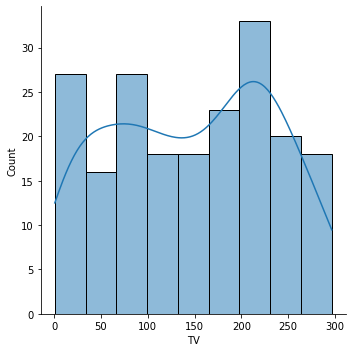

In [11]:
sns.displot(df["TV"],kde=True)

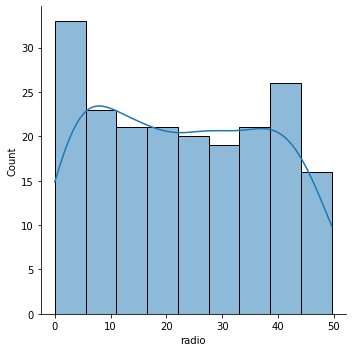

In [12]:
sns.displot(df["radio"],kde=True)

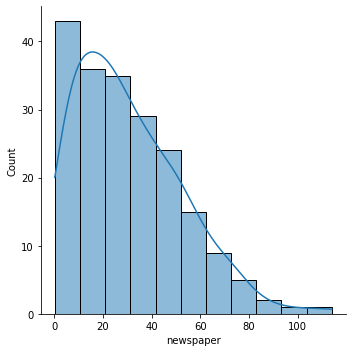

In [13]:
sns.displot(df["newspaper"],kde=True)

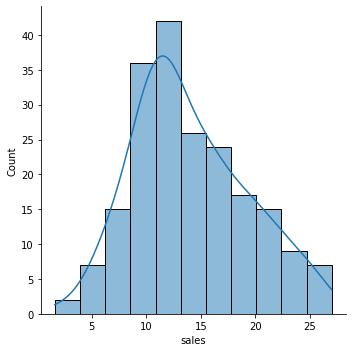

In [14]:
sns.displot(df["sales"],kde=True)

# Describe the dataset:

In [15]:
df.describe()

,Index,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

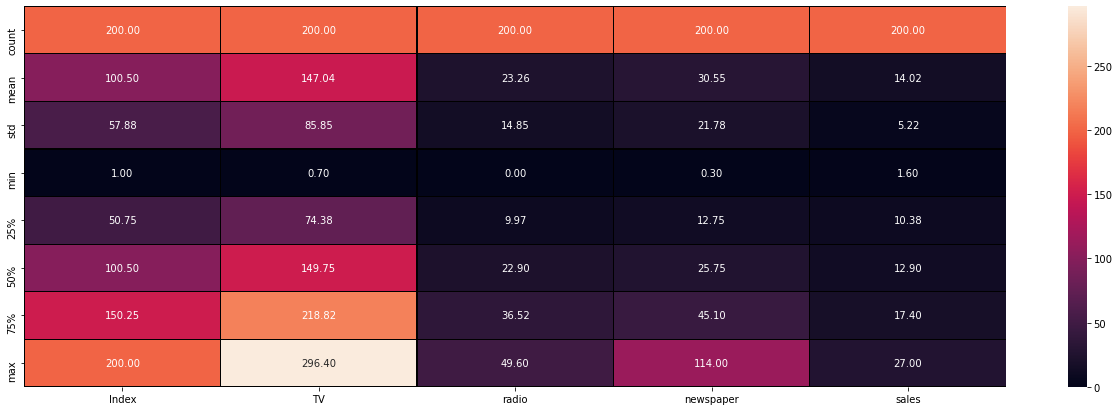

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True, linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [17]:
df.corr()

,Index,TV,radio,newspaper,sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [18]:
df.corr()['sales'].sort_values()

Index       -0.051616
newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

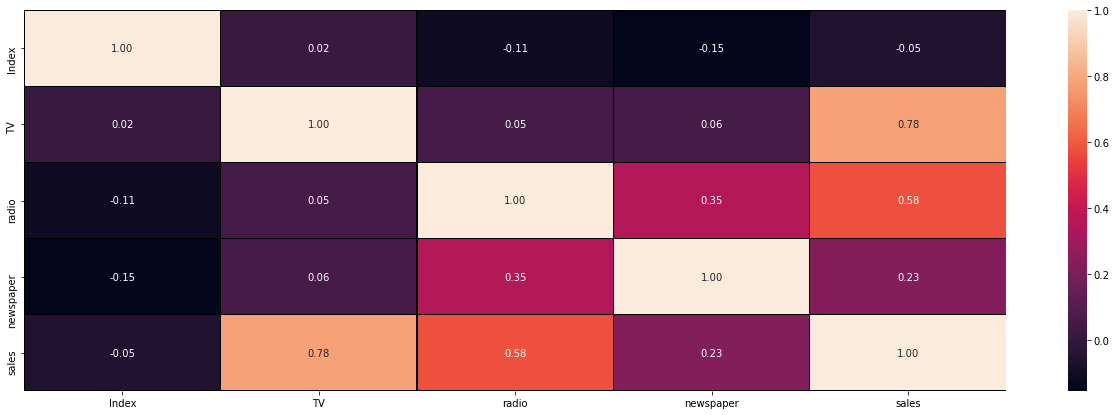

In [19]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.1,linecolor="black", fmt="0.2f")

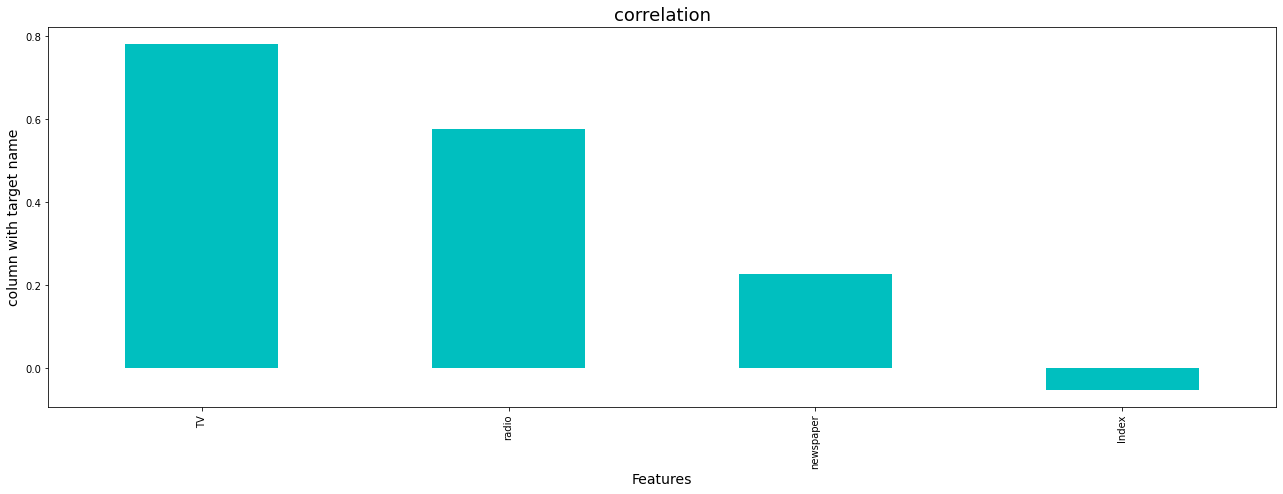

In [20]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color="c")
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [21]:
df.skew()

Index        0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Outlier Check:

In [22]:
df.dtypes

Index          int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:>

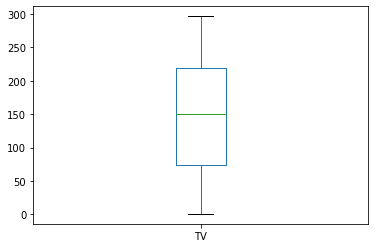

In [23]:
df["TV"].plot.box()

<AxesSubplot:>

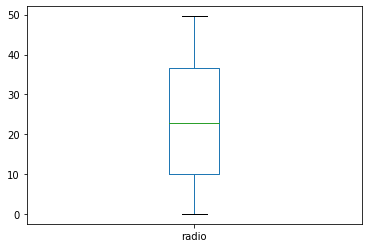

In [24]:
df["radio"].plot.box()

<AxesSubplot:>

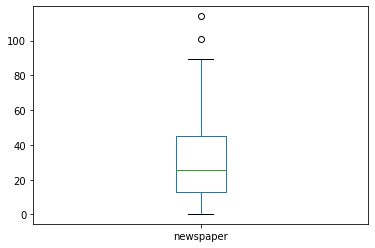

In [25]:
df["newspaper"].plot.box()

<AxesSubplot:>

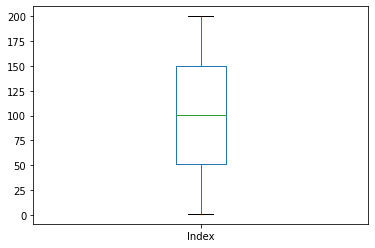

In [26]:
df["Index"].plot.box()

# Considering the outlier removal

In [27]:
df.shape

(200, 5)

In [28]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [29]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [30]:
df_new_z.shape

(198, 5)

In [31]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

# Separating the columns into features and target:

In [32]:
features=df.drop("sales", axis=1)
target=df["sales"]

# Sacling the data using Min-Max Scaler:

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")


At random state0,the training accuracy is:-0.9073274552252846
At random state0,the testing accuracy is:-0.8564802143279251


At random state1,the training accuracy is:-0.8959391993971187
At random state1,the testing accuracy is:-0.8928781912093181


At random state2,the training accuracy is:-0.9152614531156524
At random state2,the testing accuracy is:-0.7570326409482366


At random state3,the training accuracy is:-0.8931443451313652
At random state3,the testing accuracy is:-0.913444967458206


At random state4,the training accuracy is:-0.8911682084041699
At random state4,the testing accuracy is:-0.9084934434517353


At random state5,the training accuracy is:-0.89570620107301
At random state5,the testing accuracy is:-0.8985195836305799


At random state6,the training accuracy is:-0.8915582028345674
At random state6,the testing accuracy is:-0.9219412229135812


At random state7,the training accuracy is:-0.8929171093102488
At random state7,the testing accuracy is:-0.9094946118605033


At 

In [38]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [39]:
#train the model
lr.fit(features_train,target_train)

LinearRegression()

In [40]:
pred_test=lr.predict(features_test)

In [41]:
print(r2_score(target_test,pred_test))

0.9110007582766771


In [45]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is{cv_mean}and accuracy score for training is{Train_accuracy} and accuracy for the testing is{Test_accuracy}")
    print("\n")

At cross fold2 the cv score is0.8557808905096393and accuracy score for training is-1.1005688286388957 and accuracy for the testing is0.9110007582766771


At cross fold3 the cv score is0.8913539823868294and accuracy score for training is-1.1005688286388957 and accuracy for the testing is0.9110007582766771


At cross fold4 the cv score is0.8858779626590164and accuracy score for training is-1.1005688286388957 and accuracy for the testing is0.9110007582766771


At cross fold5 the cv score is0.8842777844741692and accuracy score for training is-1.1005688286388957 and accuracy for the testing is0.9110007582766771


At cross fold6 the cv score is0.8877823078964706and accuracy score for training is-1.1005688286388957 and accuracy for the testing is0.9110007582766771


At cross fold7 the cv score is0.8830284351379021and accuracy score for training is-1.1005688286388957 and accuracy for the testing is0.9110007582766771


At cross fold8 the cv score is0.879505934736525and accuracy score for traini

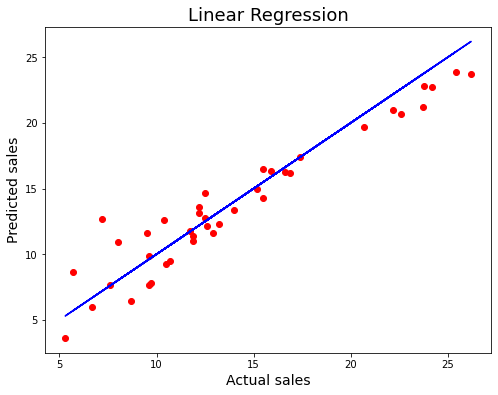

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [57]:
#final model training
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

89.13861980626946

In [58]:
lss=r2_score(target_test,pred_ls)
lss*100

91.31785872237904

In [59]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

88.5886332944758

# Ensemble technique:

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [64]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.41381344552964
Cross Val Score: 97.27591783365386


In [65]:
import pickle
filename='sales.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [66]:
loaded_model=pickle.load(open('sales.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

98.41381344552964


In [67]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,15.373,9.022,6.902,12.157,12.762,17.078,24.607,9.562,12.4,12.917,...,11.164,25.318,16.536,21.3405,6.594,21.167,13.61,22.751,11.24,7.15
Original,15.373,9.022,6.902,12.157,12.762,17.078,24.607,9.562,12.4,12.917,...,11.164,25.318,16.536,21.3405,6.594,21.167,13.61,22.751,11.24,7.15
